In [1]:
import pyautogui as pg 
import time

In [1]:
import tagui as t
t.init(visual_automation=True)
t.url('https://translate.google.com/?hl=zh-CN&sl=zh-CN&tl=en&op=translate')

True

In [6]:
pg.mouseInfo()

In [34]:
x1, y1 = 276,387 # 图标左上角
x2, y2 = 307,423 # 图标右下角
icon_region = (left, top, width, height) = (x1, y1, x2-x1, y2-y1)
image = pg.screenshot('test.png', region=icon_region)
image

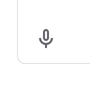

In [35]:
x1, y1 = 248,369 # 搜索区域左上角
x2, y2 = 338,460 # 搜索区域右下角
search_region = [x1, y1, x2-x1, y2-y1]
pg.screenshot(region=search_region)


In [48]:
import cv2 as cv
import pyautogui as pg 
import numpy as np
import collections
class Point():
    def __init__(self, left, top, width, height):
        self.left = int(left) 
        self.top = int(top) 
        self.width = int(width) 
        self.height = int(height) 
Box = collections.namedtuple('Box', 'left top width height')
def locate(icon: str = None): 
    # used to replace the bad pyautogui 
    # return (left, top, width, height) in pyautogui style, where 0,0 is top left.

    img_rgb = cv.imread(icon)
    img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
    full = pg.screenshot()
    filename = "full.png"
    full.save(filename)
    template = cv.imread(filename, cv.IMREAD_GRAYSCALE)
    w, h = img_gray.shape[::-1]
    res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
    threshold = 0.8
    loc = np.where( res >= threshold)
    ratio = template.shape[1]/pg.size()[0]
    print(template.shape[1], pg.size()[0])
    for pt in zip(*loc[::-1]):
        (left, top, width, height )= (int(pt[0]), int(pt[1]), w, h)
        x,y,xw,xh = left/ratio, top/ratio, width/ratio, height/ratio
        # return Point(x,y,xw,xh)
        return Box(x,y,xw,xh)

ret=locate(icon='ssbb.png')

3360 1680


In [49]:
print(ret.left, ret.top)

213.0 490.5


In [50]:
pg.moveTo(ret.left, ret.top,duration=1)
pg.center(ret)

Point(x=231.0, y=509.5)

In [51]:
pg.click(pg.center(ret))